# Introduction to SQL

### Matthew Jannetti
### August 8th, 2023

In [1]:
import pyodbc as sql
import pandas as pd
from IPython.display import Markdown as md

cnxn = sql.connect('Driver={ODBC Driver 17 for SQL Server};Server=SOPH-U753J-WD01\SQLEXPRESS;Database=Workshop;Trusted_Connection=yes;')
cn = cnxn.cursor()


def make_df(cursor):
    return pd.DataFrame([tuple(row) for row in cursor.fetchall()], columns=[h[0] for h in cursor.description])

# Goal

The goal of this workshop will be to give you a basic introduction to SQL for the purposes of querying (or extracting data) from a database for use in your projects.

# Outline

1. Overview of Relational Databases and SQL
2. How to connect to a SQL Database
3. Writing SQL Queries
4. Exporting data
5. Practice and exercises

## Relational Databases

At it's core a relational database is just a series of interconnected tables.

While there is a lot of other functionality of databases, to grasp the basics of querying data you can think of it like a series of:

- excel spreadsheets
- R/Python dataframes
- SAS datasets

All of the tables in a SQL database will connect to at least one other table in the database. It will be connected by a set of keys. These keys work similarly to ID columns that you might use when merging two datasets in your favorite analytic software.

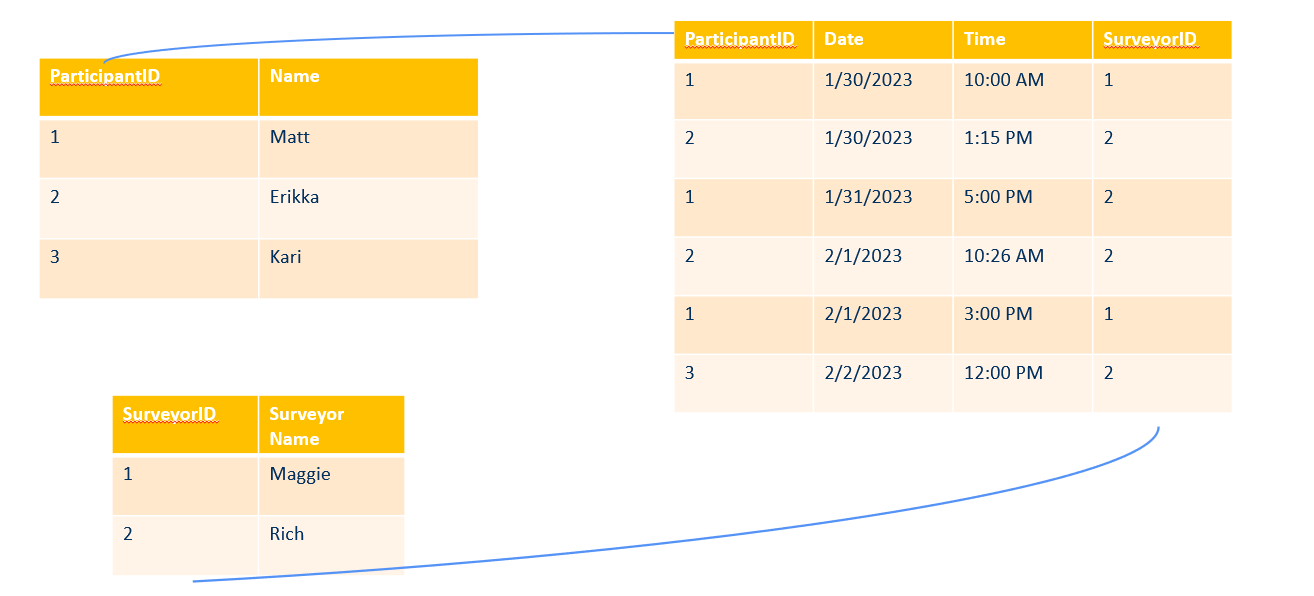

## Advantages of relational databases

1. Data can be centrally stored
2. Data types and constraints are enforced
3. Data is consistent and available to everyone with access
4. If the data is relatively large, you can do a lot of the transformations on the database server

There are plenty of other advantages not discussed here, but they will mostly not come up in this workshop.

# What is SQL

SQL (Structured Query Language) is a set of standards for interacting with relational databases.

There are **A LOT** of different versions of SQL, each is slightly different.

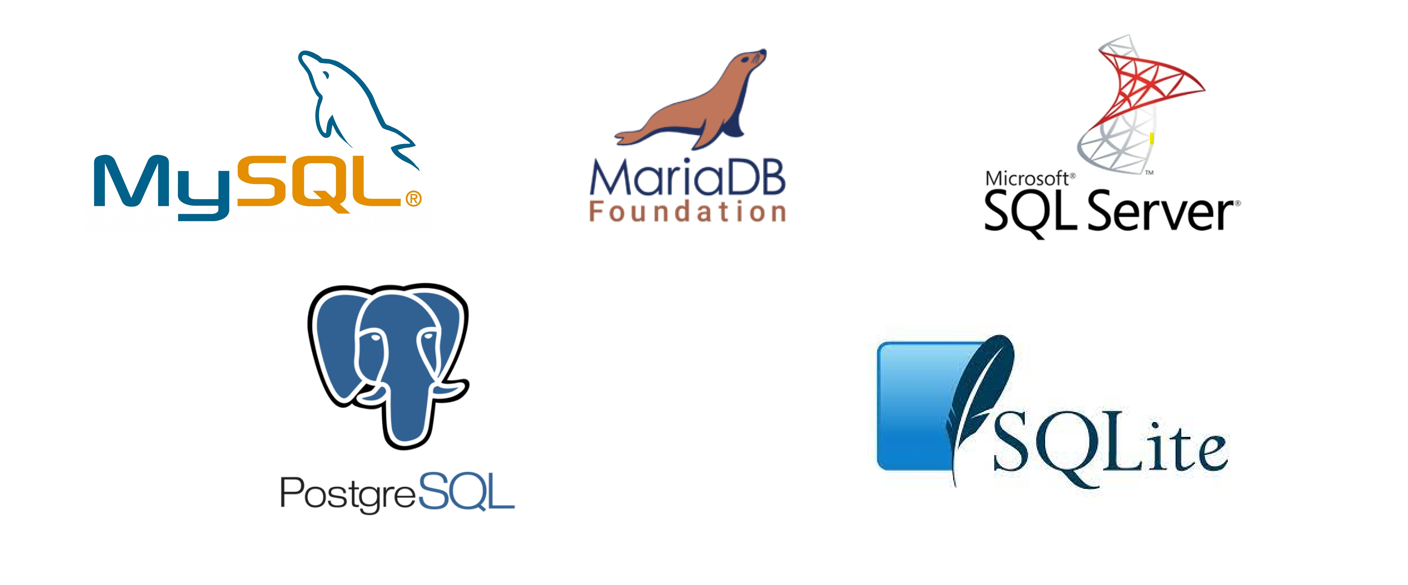

If you know how to interact with one of these, you can pretty easily figure out the others.

# SQL Server and Azure SQL

This workshop will use SQL Server/Azure SQL, which is Microsoft's version of SQL.

1. Drexel and the UHC already uses Azure
2. Drexel provides a [personal liscence](https://drexel.edu/it/computers-software/software/software-drexel/) to Drexel employees and students.
3. We can all use our Drexel credentials to access a remote database set up for this workshop

There are some differences between SQL Server and Azure SQL but they won't come up during our exercises. For our purposes, they are essentially interchangeable.

# Connecting to the Example Database

1. Open [SQL Server Management Studio](https://learn.microsoft.com/en-us/sql/ssms/download-sql-server-management-studio-ssms?view=sql-server-ver16)
2. Put the name of the server in the "server name" box (uhcdata.database.windows.net)
3. Switch the "Authentication" to "Azure Active Directory - Universal wtih MFA"
4. Put in your Drexel email in the "User name" field
5. Press connect. You will be prompted for your Drexel password. And you will need to have your phone handy for the 2-factor authentication.
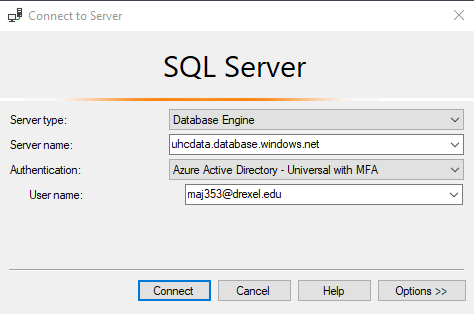

# Connecting to the Example Database

In the top left corner, select "New Query"

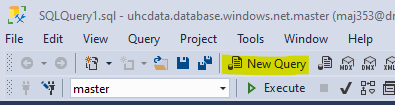

Then click the dropdown and select "SQLWorkshop"

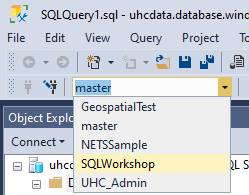

# Using the Object Explorer

The object explorer is the left hand pane, it shows the databases on the server. You can also expand the databases to see the tables and the tables to see the columns in each table.

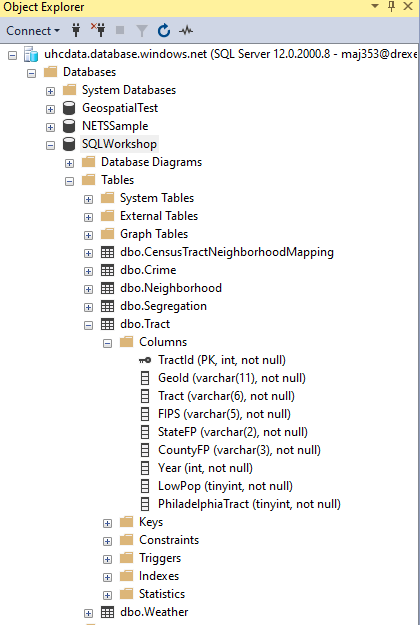

# Query Writing UI

The top of the main section of the window is where you will write your queries.

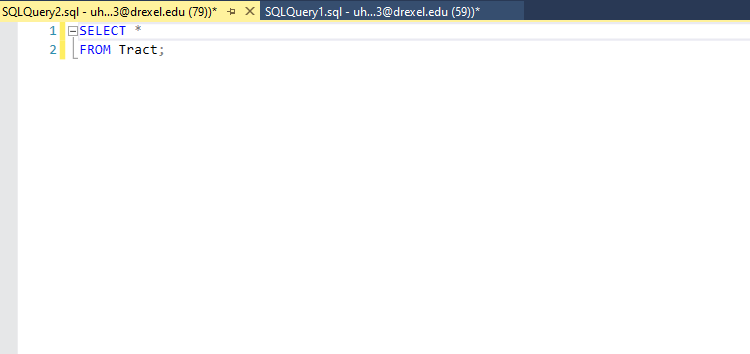

When you want to run a query, highlight the portion of the text you want to run and press the execute button up top

# Query Results

The bottom half of the main window is where the query results will display.

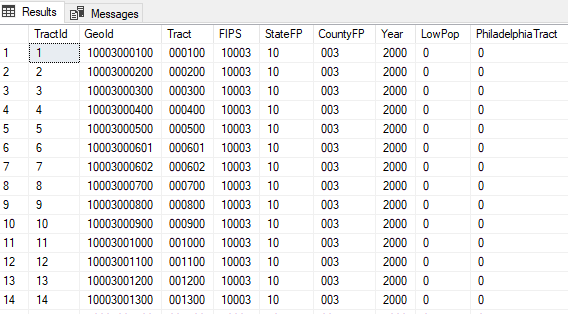

you can click the "Messages" tab to see messages about status or other console type messages.

# How to Write a SQL Query

- SQL queries or statements is how you look at and extract data from a SQL server.
- Each query is separated into "clauses"

Learning the basic clauses and some extra keywords is enough to do the vast majority data manipulation in SQL

# The Clauses

- **FROM**: picks which table in the datatable that you are starting with
- **SELECT**: picks which columns of the from table and joined tables appear in the result
- **WHERE**: filters which rows are included in the result
- **JOIN**: merges other tables with the from table

### Extra clauses
- **ORDER BY**: sort by a column or series of columns (combine with the DESC keyword to control the order)
- **GROUP BY**: used to aggregate rows by a given column or series of columns (used with some keywords to produce things like averages and counts)

```sql
SELECT *
FROM [table]
```

```sql
SELECT [column1], [column2]
FROM [table]
```

```sql
SELECT *
FROM Tract
```

In [3]:
cn.execute("SELECT * FROM Tract")
make_df(cn)

,TractId,GeoId,Tract,FIPS,StateFP,CountyFP,Year,LowPop,PhiladelphiaTract
0,21329,10003000100,000100,10003,10,003,2000,0,0
1,21330,10003000200,000200,10003,10,003,2000,0,0
2,21331,10003000300,000300,10003,10,003,2000,0,0
3,21332,10003000400,000400,10003,10,003,2000,0,0
4,21333,10003000500,000500,10003,10,003,2000,0,0
...,...,...,...,...,...,...,...,...,...
5327,26656,24015030904,030904,24015,24,015,2020,0,0
5328,26657,24015030700,030700,24015,24,015,2020,0,0
5329,26658,24015031202,031202,24015,24,015,2020,0,0
5330,26659,24015031400,031400,24015,24,015,2020,0,0


```sql
SELECT GeoId, FIPS, PhiladelphiaTract
FROM Tract
```

In [4]:
cn.execute("SELECT GeoId, FIPS, PhiladelphiaTract FROM Tract")
make_df(cn)

,GeoId,FIPS,PhiladelphiaTract
0,10003000100,10003,0
1,10003000200,10003,0
2,10003000300,10003,0
3,10003000400,10003,0
4,10003000500,10003,0
...,...,...,...
5327,24015030904,24015,0
5328,24015030700,24015,0
5329,24015031202,24015,0
5330,24015031400,24015,0


## Keywords in the SELECT Statement

There are plenty of keywords or functions you can use in the select statement to modify the output.

For example, the **top** keyword will let you pick the first N rows of a query

```sql
SELECT TOP 5 GeoId, FIPS, PhiladelphiaTract
FROM Tract
```

In [5]:
cn.execute("SELECT TOP 5 GeoId, FIPS, PhiladelphiaTract FROM Tract")
make_df(cn)

,GeoId,FIPS,PhiladelphiaTract
0,10003000100,10003,0
1,10003000200,10003,0
2,10003000300,10003,0
3,10003000400,10003,0
4,10003000500,10003,0


## Where Clauses

Used for subsetting the table

```SQL
SELECT GeoId, FIPS, PhiladelphiaTract
FROM Tract
WHERE PhiladelphiaTract=1
```

In [6]:
cn.execute("SELECT GeoId, FIPS, PhiladelphiaTract FROM Tract WHERE PhiladelphiaTract=1")
make_df(cn)

,GeoId,FIPS,PhiladelphiaTract
0,42101000100,42101,1
1,42101000200,42101,1
2,42101000300,42101,1
3,42101000400,42101,1
4,42101000500,42101,1
...,...,...,...
1168,42101002802,42101,1
1169,42101002701,42101,1
1170,42101980600,42101,1
1171,42101036501,42101,1


## Searching for Strings

In some database systems, string conditionals are case sensitive (but not in the database we are using today).

```sql
SELECT *
FROM Neighborhood
WHERE Neighborhood='University City'
```

In [7]:
cn.execute("""SELECT * FROM Neighborhood
WHERE Neighborhood='University City'""")
make_df(cn)

,NeighborhoodId,Neighborhood,Shape_Leng,Shape_Area
0,10,University City,11830.311523,5777707.5


## Other Operators

You can also use other operators such as >, >=, <, <=, IS NULL, IS NOT NULL, BETWEEN, and LIKE to filter the results.

```sql
SELECT *
FROM Weather
WHERE AvgTemp > 10
```

In [8]:
cn.execute("SELECT * FROM Weather WHERE AvgTemp > 10")
make_df(cn)

,WeatherId,TractId,Year,Month,NumMonth,AvgTemp,MaxTemp,MinTemp,TotPpt,MinVP,MaxVP,AvgDPTemp
0,4,24709,2005,April,4,12.572927,19.015528,6.131508,127.517159,0.807038,14.233975,3.769631
1,5,24709,2005,May,5,14.665885,20.930977,8.402382,106.256607,0.365076,13.969968,7.882780
2,6,24709,2005,June,6,22.697632,28.167263,17.229803,95.863174,0.336816,17.135292,17.337898
3,7,24709,2005,July,7,25.349329,30.702368,19.997959,128.219376,0.125650,18.210075,20.690350
4,8,24709,2005,August,8,25.118080,30.377020,19.860121,80.542473,0.119305,17.822693,20.596968
...,...,...,...,...,...,...,...,...,...,...,...,...
184960,311754,24553,2019,June,6,23.078955,28.078943,18.079168,153.255753,3.321621,21.594011,14.780686
184961,311755,24553,2019,July,7,26.948427,31.952065,21.944790,141.174179,3.665261,26.108957,19.386669
184962,311756,24553,2019,August,8,25.102762,29.906923,20.298605,153.159454,3.060116,22.294205,18.023926
184963,311757,24553,2019,September,9,22.068762,27.830681,16.307043,44.442844,2.469159,21.502031,14.588995


```sql
SELECT *
FROM Weather
WHERE NumMonth BETWEEN 4 AND 7
```

In [9]:
cn.execute("SELECT * FROM Weather WHERE NumMonth BETWEEN 4 AND 7")
make_df(cn)


,WeatherId,TractId,Year,Month,NumMonth,AvgTemp,MaxTemp,MinTemp,TotPpt,MinVP,MaxVP,AvgDPTemp
0,4,24709,2005,April,4,12.572927,19.015528,6.131508,127.517159,0.807038,14.233975,3.769631
1,5,24709,2005,May,5,14.665885,20.930977,8.402382,106.256607,0.365076,13.969968,7.882780
2,6,24709,2005,June,6,22.697632,28.167263,17.229803,95.863174,0.336816,17.135292,17.337898
3,7,24709,2005,July,7,25.349329,30.702368,19.997959,128.219376,0.125650,18.210075,20.690350
4,16,24704,2005,April,4,12.661152,18.981770,6.341870,117.991402,0.956501,14.247961,3.695716
...,...,...,...,...,...,...,...,...,...,...,...,...
103915,311743,24468,2019,July,7,26.938503,31.664860,22.212286,153.382187,3.600305,24.800777,19.531960
103916,311752,24553,2019,April,4,14.466883,19.849751,9.084216,111.233406,2.333102,13.814125,5.315979
103917,311753,24553,2019,May,5,18.673878,23.456200,13.891560,199.818741,2.292322,15.252146,11.842346
103918,311754,24553,2019,June,6,23.078955,28.078943,18.079168,153.255753,3.321621,21.594011,14.780686


```SQL
SELECT *
FROM Weather
WHERE Month LIKE '%ber'
```

In [10]:
cn.execute("SELECT * FROM Weather WHERE Month LIKE '%ber'")
make_df(cn)


,WeatherId,TractId,Year,Month,NumMonth,AvgTemp,MaxTemp,MinTemp,TotPpt,MinVP,MaxVP,AvgDPTemp
0,9,24709,2005,September,9,21.901575,28.985405,14.819284,12.058510,0.418603,21.757061,15.548416
1,10,24709,2005,October,10,14.305144,19.338591,9.272705,194.581848,0.259238,9.357236,9.816828
2,11,24709,2005,November,11,9.382105,15.985790,2.779873,92.569778,0.383877,10.237570,3.132024
3,12,24709,2005,December,12,1.201546,6.182182,-3.778183,89.817223,0.303204,4.526224,-4.469576
4,21,24704,2005,September,9,22.105551,28.798840,15.413923,11.901628,0.840519,21.380234,15.392494
...,...,...,...,...,...,...,...,...,...,...,...,...
103915,311748,24468,2019,December,12,3.495770,7.363856,-0.372222,144.789124,1.022133,4.719750,-2.270247
103916,311757,24553,2019,September,9,22.068762,27.830681,16.307043,44.442844,2.469159,21.502031,14.588995
103917,311758,24553,2019,October,10,15.712886,20.478088,10.947883,118.172073,1.799570,12.500401,9.558785
103918,311759,24553,2019,November,11,6.222103,11.659143,0.785063,46.920822,1.280842,7.820876,-1.232803


```SQL
SELECT *
FROM Weather
WHERE Month IN ('September', 'October', 'November', 'December')
```

In [25]:
cn.execute("SELECT * FROM Weather WHERE Month IN ('September', 'October', 'November', 'December')")
make_df(cn)

,WeatherId,TractId,Year,Month,NumMonth,AvgTemp,MaxTemp,MinTemp,TotPpt,MinVP,MaxVP,AvgDPTemp
0,9,24709,2005,September,9,21.901575,28.985405,14.819284,12.058510,0.418603,21.757061,15.548416
1,10,24709,2005,October,10,14.305144,19.338591,9.272705,194.581848,0.259238,9.357236,9.816828
2,11,24709,2005,November,11,9.382105,15.985790,2.779873,92.569778,0.383877,10.237570,3.132024
3,12,24709,2005,December,12,1.201546,6.182182,-3.778183,89.817223,0.303204,4.526224,-4.469576
4,21,24704,2005,September,9,22.105551,28.798840,15.413923,11.901628,0.840519,21.380234,15.392494
...,...,...,...,...,...,...,...,...,...,...,...,...
103915,311748,24468,2019,December,12,3.495770,7.363856,-0.372222,144.789124,1.022133,4.719750,-2.270247
103916,311757,24553,2019,September,9,22.068762,27.830681,16.307043,44.442844,2.469159,21.502031,14.588995
103917,311758,24553,2019,October,10,15.712886,20.478088,10.947883,118.172073,1.799570,12.500401,9.558785
103918,311759,24553,2019,November,11,6.222103,11.659143,0.785063,46.920822,1.280842,7.820876,-1.232803


```SQL
SELECT TractId, CTVNOORA
FROM Crime
WHERE CTVNOORA IS NULL
```

In [26]:
cn.execute("SELECT TractId, CTVNOORA FROM Crime WHERE CTVNOORA IS NULL")
make_df(cn)

,TractId,CTVNOORA
0,24287,None
1,24287,None
2,24287,None
3,24287,None
4,24287,None
...,...,...
136,24468,None
137,24468,None
138,24468,None
139,24468,None


```SQL
SELECT TractId, CTVNOORA
FROM Crime
WHERE CTVNOORA IS NOT NULL
```

In [27]:
cn.execute("SELECT TractId, CTVNOORA FROM Crime WHERE CTVNOORA IS NOT NULL")
make_df(cn)

,TractId,CTVNOORA
0,24203,166.196228
1,24203,123.891731
2,24203,177.514786
3,24203,155.269241
4,24203,106.817467
...,...,...
5998,24553,193.263397
5999,24553,193.263397
6000,24553,143.567093
6001,24553,226.394257


## Combining Multiple Conditions

Use **AND** and **OR** operators to combine conditionals together

```SQL
SELECT GeoId, FIPS, PhiladelphiaTract
FROM Tract
WHERE PhiladelphiaTract=1 AND LowPop=0
```

In [11]:
cn.execute("SELECT GeoId, FIPS, PhiladelphiaTract FROM Tract WHERE PhiladelphiaTract=1 AND LowPop=0")
make_df(cn)

,GeoId,FIPS,PhiladelphiaTract
0,42101000100,42101,1
1,42101000200,42101,1
2,42101000300,42101,1
3,42101000400,42101,1
4,42101000500,42101,1
...,...,...,...
1114,42101003001,42101,1
1115,42101002802,42101,1
1116,42101002701,42101,1
1117,42101036501,42101,1


## Be careful with ORs

```sql
SELECT GeoId, FIPS, PhiladelphiaTract
FROM Tract
WHERE PhiladelphiaTract=1 OR StateFP='34' AND LowPop=0
```

#### **IS NOT** equivalent to

```sql
SELECT GeoId, FIPS, PhiladelphiaTract
FROM Tract
WHERE (PhiladelphiaTract=1 OR StateFP='34') AND LowPop=0
```

In [12]:
row_count1 = cn.execute("SELECT COUNT(*) FROM Tract WHERE PhiladelphiaTract=1 OR StateFP='34' AND LowPop=0").fetchall()[0][0]
row_count2 = cn.execute("SELECT COUNT(*) FROM Tract WHERE (PhiladelphiaTract=1 OR StateFP='34') AND LowPop=0").fetchall()[0][0]

md(f"### The first query returns {row_count1} rows but the second returns {row_count2}. Why?")

### The first query returns 2627 rows but the second returns 2573. Why?

### Hint

The number of New Jersey tracts stays the same in the results, but the number of Pennsylvania census tracts goes down in the second query.

In [13]:
cn.execute("""SELECT StateFP, PhiladelphiaTract, COUNT(*) as Count
              FROM (SELECT GeoId, FIPS, StateFP, PhiladelphiaTract
                    FROM Tract
                    WHERE PhiladelphiaTract=1 OR StateFP='34' AND LowPop=0) a
              GROUP BY StateFP, PhiladelphiaTract""")
           
make_df(cn)

,StateFP,PhiladelphiaTract,Count
0,34,0,1454
1,42,1,1173


In [14]:
cn.execute("""SELECT StateFP, PhiladelphiaTract, COUNT(*) as Count
              FROM (SELECT GeoId, FIPS, StateFP, PhiladelphiaTract
                    FROM Tract
                    WHERE(PhiladelphiaTract=1 OR StateFP='34') AND LowPop=0) a
              GROUP BY StateFP, PhiladelphiaTract""")
           
make_df(cn)

,StateFP,PhiladelphiaTract,Count
0,34,0,1454
1,42,1,1119


### Answer

This conditional pulls all Philadelphia census tracts and only New Jersey census tracts that are not low population.
```sql
WHERE PhiladelphiaTract=1 OR StateFP='34' AND LowPop=0
```

This conditional pulls all low population census tracts in Philadelphia and New Jersey. The second query removes the low population Philadelphia tracts that were included in the first query.
```sql
WHERE (PhiladelphiaTract=1 OR StateFP='34') AND LowPop=0
```

# Joins

If you need to combine multiple tables, joins are how you merge tables.

There are multiple types of joins:

- **LEFT**: Keeps all of the data in the from table and fills the joined with NULL if there is no match on the joined table
- **RIGHT**: Keeps all of the data in the joined table and fills the from table will NULL if there is no match
- **INNER**: Keeps only records that are in both tables
- **FULL**: Keeps all records in both tables and fills both the from and joined table with NULL when there isn't a match

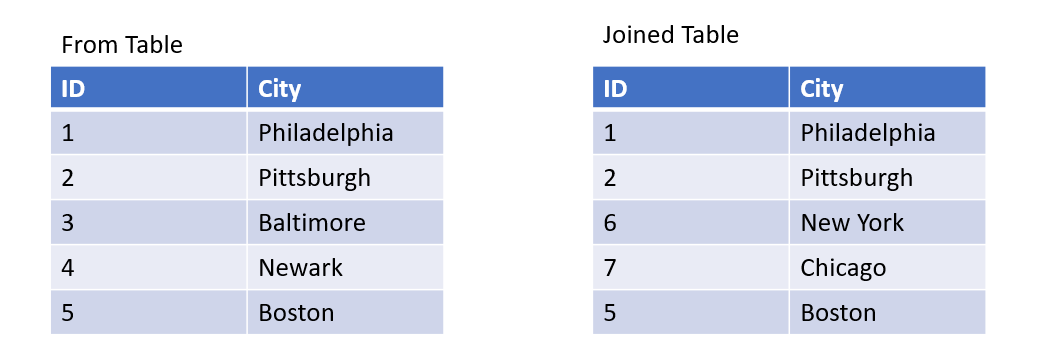

### Left Join

|ID|From City|Joined City|
|--|---------|-----------|
|1|Philadelphia|Philadelphia|
|2|Pittsburgh|Pittsburgh|
|3|Baltimore|NULL|
|4|Newark|NULL|
|5|Boston|Boston|


### Right Join
|ID|From City|Joined City|
|--|---------|-----------|
|1|Philadelphia|Philadelphia|
|2|Pittsburgh|Pittsburgh|
|3|NULL|New York|
|4|NULL|Chicago|
|5|Boston|Boston|


### Inner Join
|ID|From City|Joined City|
|--|---------|-----------|
|1|Philadelphia|Philadelphia|
|2|Pittsburgh|Pittsburgh|
|5|Boston|Boston|

### Full Join
|ID|From City|Joined City|
|--|---------|-----------|
|1|Philadelphia|Philadelphia|
|2|Pittsburgh|Pittsburgh|
|3|Baltimore|NULL|
|4|Newark|NULL|
|5|Boston|Boston|
|6|NULL|New York|
|7|NULL|Chicago|

```sql
SELECT Tract.TractId, Tract.GeoId, Weather.MinTemp, Weather.MaxTemp
FROM Tract
INNER JOIN Weather ON Weather.TractId=Tract.TractId
```

In [15]:
cn.execute("""SELECT Tract.TractId, Tract.GeoId, Weather.MinTemp, Weather.MaxTemp
FROM Tract
INNER JOIN Weather ON Weather.TractId=Tract.TractId
""")
make_df(cn)

,TractId,GeoId,MinTemp,MaxTemp
0,24709,10001040100,-3.866622,5.283027
1,24709,10001040100,-3.306153,7.448359
2,24709,10001040100,-0.716506,9.111247
3,24709,10001040100,6.131508,19.015528
4,24709,10001040100,8.402382,20.930977
...,...,...,...,...
311755,24553,42101989100,20.298605,29.906923
311756,24553,42101989100,16.307043,27.830681
311757,24553,42101989100,10.947883,20.478088
311758,24553,42101989100,0.785063,11.659143


```sql
SELECT t.TractId, t.GeoId, w.MinTemp, w.MaxTemp
FROM Tract t
LEFT JOIN Weather w ON w.TractId=t.TractId
```

In [16]:
cn.execute("""SELECT t.TractId, t.GeoId, w.MinTemp, w.MaxTemp
FROM Tract t
LEFT JOIN Weather w ON w.TractId=t.TractId
""")
make_df(cn)

,TractId,GeoId,MinTemp,MaxTemp
0,24709,10001040100,-3.866622,5.283027
1,24709,10001040100,-3.306153,7.448359
2,24709,10001040100,-0.716506,9.111247
3,24709,10001040100,6.131508,19.015528
4,24709,10001040100,8.402382,20.930977
...,...,...,...,...
315355,22722,42101010700,NaN,NaN
315356,24886,10003002200,NaN,NaN
315357,25427,42101001400,NaN,NaN
315358,25968,42045404800,NaN,NaN


## Chaining Joins

You can join tables on other tables that have been joined in the query to chain tables together.

```sql
SELECT t.TractId, t.GeoId, n.Neighborhood
FROM Tract t
INNER JOIN CensusTractNeighborhoodMapping ctn ON ctn.TractId=t.TractId
INNER JOIN Neighborhood n ON n.NeighborhoodId=ctn.NeighborhoodId
```

In [17]:
cn.execute("""
SELECT t.TractId, t.GeoId, n.Neighborhood
FROM Tract t
INNER JOIN CensusTractNeighborhoodMapping ctn ON ctn.TractId=t.TractId
INNER JOIN Neighborhood n ON n.NeighborhoodId=ctn.NeighborhoodId
""")
make_df(cn)

,TractId,GeoId,Neighborhood
0,21474,34005700104,Richmond - Bridesburg
1,21475,34005700200,Wissinoming - Tacony
2,21492,34005700603,Torresdale S. - Pennypack Park
3,21497,34005700800,Torresdale S. - Pennypack Park
4,21595,34007600500,Center City E
...,...,...,...
2746,26338,34007610800,Richmond - Bridesburg
2747,26378,34005700800,Torresdale S. - Pennypack Park
2748,26528,34007600700,Center City E
2749,26528,34007600700,Lower Kensington


## Order By

Sort the result of a query by a column or columns


```SQL
SELECT t.TractId, t.GeoId, n.Neighborhood
FROM Tract t
INNER JOIN CensusTractNeighborhoodMapping ctn ON ctn.TractId=t.TractId
INNER JOIN Neighborhood n ON n.NeighborhoodId=ctn.NeighborhoodId
WHERE t.Year=2020
ORDER BY n.Neighborhood
```

In [18]:
cn.execute("""
SELECT t.TractId, t.GeoId, n.Neighborhood
FROM Tract t
INNER JOIN CensusTractNeighborhoodMapping ctn ON ctn.TractId=t.TractId
INNER JOIN Neighborhood n ON n.NeighborhoodId=ctn.NeighborhoodId
WHERE t.Year=2020
ORDER BY n.Neighborhood
""")
make_df(cn)

,TractId,GeoId,Neighborhood
0,24997,42101034502,Bustleton
1,25034,42101034501,Bustleton
2,25176,42101980300,Bustleton
3,25177,42101035500,Bustleton
4,25179,42101035900,Bustleton
...,...,...,...
996,26022,42101031501,Wissinoming - Tacony
997,26154,34005700303,Wissinoming - Tacony
998,26156,34005700104,Wissinoming - Tacony
999,26246,34005700103,Wissinoming - Tacony


## Order By Multiple Columns

```SQL
SELECT t.TractId, t.GeoId, n.Neighborhood
FROM Tract t
INNER JOIN CensusTractNeighborhoodMapping ctn ON ctn.TractId=t.TractId
INNER JOIN Neighborhood n ON n.NeighborhoodId=ctn.NeighborhoodId
WHERE t.Year=2020
ORDER BY n.Neighborhood, t.GeoId
```

In [19]:
cn.execute("""
SELECT t.TractId, t.GeoId, n.Neighborhood
FROM Tract t
INNER JOIN CensusTractNeighborhoodMapping ctn ON ctn.TractId=t.TractId
INNER JOIN Neighborhood n ON n.NeighborhoodId=ctn.NeighborhoodId
WHERE t.Year=2020
ORDER BY n.Neighborhood, t.GeoId
""")
make_df(cn)

,TractId,GeoId,Neighborhood
0,25699,42091200105,Bustleton
1,26103,42091201501,Bustleton
2,25975,42101034200,Bustleton
3,25976,42101034400,Bustleton
4,25034,42101034501,Bustleton
...,...,...,...
996,25111,42101033000,Wissinoming - Tacony
997,26020,42101033101,Wissinoming - Tacony
998,25259,42101038000,Wissinoming - Tacony
999,25597,42101038100,Wissinoming - Tacony


## Change the Sort Direction

```SQL
SELECT t.TractId, t.GeoId, n.Neighborhood
FROM Tract t
INNER JOIN CensusTractNeighborhoodMapping ctn ON ctn.TractId=t.TractId
INNER JOIN Neighborhood n ON n.NeighborhoodId=ctn.NeighborhoodId
WHERE t.Year=2020
ORDER BY n.Neighborhood DESC, t.GeoId
```

In [20]:
cn.execute("""
SELECT t.TractId, t.GeoId, n.Neighborhood
FROM Tract t
INNER JOIN CensusTractNeighborhoodMapping ctn ON ctn.TractId=t.TractId
INNER JOIN Neighborhood n ON n.NeighborhoodId=ctn.NeighborhoodId
WHERE t.Year=2020
ORDER BY n.Neighborhood DESC, t.GeoId
""")
make_df(cn)

,TractId,GeoId,Neighborhood
0,26246,34005700103,Wissinoming - Tacony
1,26156,34005700104,Wissinoming - Tacony
2,26324,34005700200,Wissinoming - Tacony
3,26154,34005700303,Wissinoming - Tacony
4,25278,42101018400,Wissinoming - Tacony
...,...,...,...
996,26011,42101035702,Bustleton
997,25179,42101035900,Bustleton
998,25180,42101036000,Bustleton
999,25569,42101980200,Bustleton


# Aggregating Data (Group By)

Aggregating data to get counts or averages for example are usually done with the GROUP BY statement and keywords that go in the select statment.

For example, if we wanted to get a count of the number of census tracts in each state and year, we could run this:

```SQL
SELECT StateFP, Year, COUNT(GeoId)
FROM Tract
GROUP BY StateFP, Year
```

In [21]:
cn.execute("""
SELECT StateFP, Year, COUNT(GeoId)
FROM Tract
GROUP BY StateFP, Year
""")
make_df(cn)

,StateFP,Year,
0,24,2010,19
1,42,2000,1069
2,34,2000,451
3,10,2010,164
4,34,2020,489
5,42,2010,1088
6,10,2000,127
7,34,2010,544
8,24,2000,16
9,24,2020,21


When you are aggregating data, generally, every column in the SELECT clause must also be in the GROUP BY clause (except for the aggregated columns themselves).

This query would result in an error:

```SQL
SELECT StateFP, CountyFP, Year, COUNT(GeoId)
FROM Tract
GROUP BY StateFP, Year

-- Column 'Tract.CountyFP' is invalid in the select list because it is not contained in either an aggregate function or the GROUP BY clause.
```

But something like this would not:

```SQL
SELECT StateFP, Year, COUNT(GeoId), SUM(LowPop)
FROM Tract
GROUP BY StateFP, Year
```

You can sort by the aggregate column as well.

```SQL
SELECT StateFP, Year, COUNT(GeoId)
FROM Tract
GROUP BY StateFP, Year
ORDER BY 3 DESC
```

In [22]:
cn.execute("""
SELECT StateFP, Year, COUNT(GeoId)
FROM Tract
GROUP BY StateFP, Year
ORDER BY 3 DESC
""")
make_df(cn)

,StateFP,Year,
0,42,2020,1157
1,42,2010,1088
2,42,2000,1069
3,34,2010,544
4,34,2020,489
5,34,2000,451
6,10,2020,187
7,10,2010,164
8,10,2000,127
9,24,2020,21


You might notice that the COUNT column doesn't have a name in your results table. You can use the AS keyword to name it. You can use the alias in the ORDER BY clause as well

```SQL
SELECT StateFP, Year, COUNT(GeoId) AS TractCount
FROM Tract
GROUP BY StateFP, Year
ORDER BY TractCount DESC
```

In [23]:
cn.execute("""
SELECT StateFP, Year, COUNT(GeoId) AS TractCount
FROM Tract
GROUP BY StateFP, Year
ORDER BY TractCount DESC
""")
make_df(cn)

,StateFP,Year,TractCount
0,42,2020,1157
1,42,2010,1088
2,42,2000,1069
3,34,2010,544
4,34,2020,489
5,34,2000,451
6,10,2020,187
7,10,2010,164
8,10,2000,127
9,24,2020,21


You can rename any column in the query as well, not just aggregate columns.

```SQL
SELECT StateFP AS StateFIPS, Year, COUNT(GeoId) AS TractCount
FROM Tract
GROUP BY StateFP, Year
ORDER BY TractCount DESC
```

In [24]:
cn.execute("""
SELECT StateFP AS StateFIPS, Year, COUNT(GeoId) AS TractCount
FROM Tract
GROUP BY StateFP, Year
ORDER BY TractCount DESC
""")
make_df(cn)

,StateFIPS,Year,TractCount
0,42,2020,1157
1,42,2010,1088
2,42,2000,1069
3,34,2010,544
4,34,2020,489
5,34,2000,451
6,10,2020,187
7,10,2010,164
8,10,2000,127
9,24,2020,21


There are several other aggregate functions that you could use to do data analysis:

|Function|Description|
|--------|-----------|
|AVG|Average of column/group|
|MAX|Max value of the column/group|
|MIN|Min value of the column/group|
|STDEV|Sample standard deviation of the values in the column/group|
|STDEVP|Population standard deviation of the values in the column/group|
|STRING_AGG|Concatenate strings in column/group, separate with deliminator|
|SUM|Sum values in column/group|
|VAR|Sample variance of values in column/group|
|VARP|Population variance of values in column/group|


# Exporting Data


If you've already run the query you can right click on the table to copy the data or to save the results.

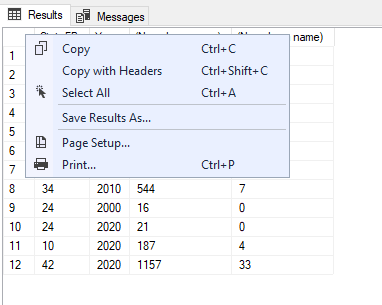

If you haven't run the query, go to the "Query" menu, go to "Results To", and select "Results to File."

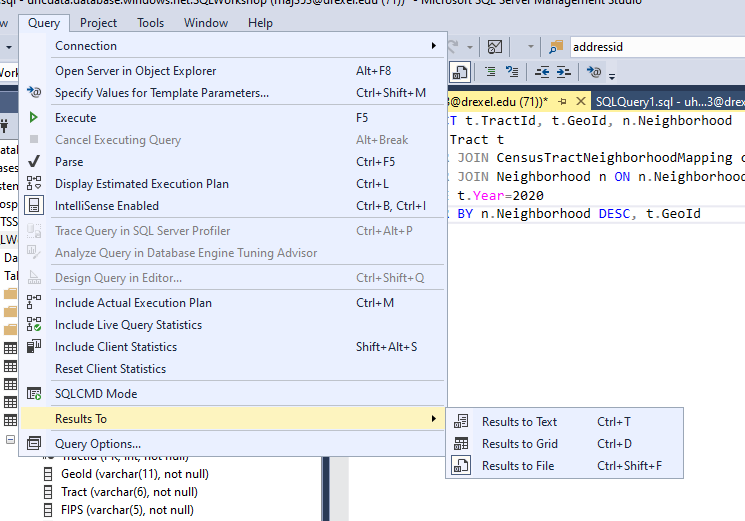

Press the execute button and it should open up a file save dialog box. It will try to export it as a .rpt file, but you probably don't want that. So instead in the "Query" menu select "Query Options." In the dialog box, you will want to click on "Text" under the "Results" section on the left side.

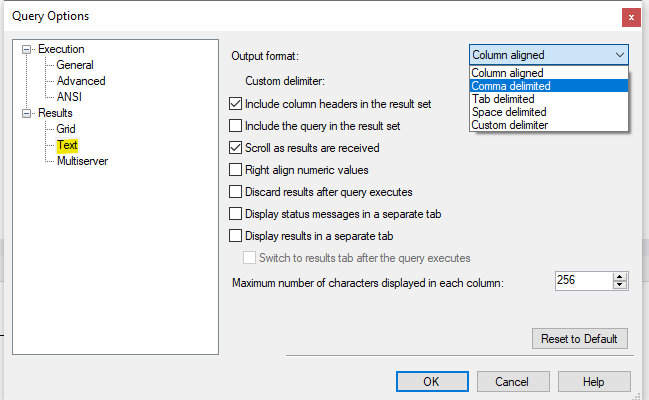

you can specify the delimiter using the "output format" dropdown menu. Comma delimited or tab delimited will let you save to a .csv or .txt file.

## Importing Directly into Statistical Software

A lot of the software we use for data analysis can interact directly with SQL databases using the Open Database Connectivity (ODBC) protocol. You can pull directly from the database into an object in the piece of software of your choice. Here are a few examples.

### Python

There are several options for connecting to a database in python. The below example uses pyodbc, but another common library is [SQLAlchemy](https://www.sqlalchemy.org/)

```python
import pyodbc

# must have the correct ODBC driver installed, this should have been installed automatically when you installed SQL Server Management Studio
cnxn = pyodbc.connect('{ODBC Driver 17 for SQL Server};Server=tcp:uhcdata.database.windows.net,1433;Database=SQLWorkshop;UID=maj353@drexel.edu;MultipleActiveResultSets=False;Authentication=ActiveDirectoryInteractive;')
cn = cnxn.cursor()

cn.execute("SELECT * FROM Tract")

results = cn.fetchall()
```

### R
```R
library('RODBC')

cnxn <- odbcDriverConnect('Driver={ODBC Driver 17 for SQL Server};Server=tcp:uhcdata.database.windows.net,1433;Database=SQLWorkshop;UID=maj353@drexel.edu;MultipleActiveResultSets=False;Authentication=ActiveDirectoryInteractive;')
sqlQuery(cnxn, "SELECT * FROM Tract")
```

### SAS

https://support.sas.com/en/software/sas-odbc-drivers.html#c1d85777-acb8-4b35-a4cd-0a97a8060229

### ArcGIS Pro

1. Open the catalog pane
2. Right click databases and select "New Database Connection"
3. Fill in the dialog box and sign-in when prompted

Now you can add geographic data to a map or export to an attribute table for use in your project.